In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost
from xgboost import XGBClassifier

from sklearn import model_selection
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

plt.rcParams['figure.figsize'] = (12, 9)
plt.style.use('ggplot')

import shap
shap.initjs()

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

/Users/nitanshjain/.local/share/virtualenvs/Shopper_Intent_Prediction-jr_Cp9Sf/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/nitanshjain/.local/share/virtualenvs/Shopper_Intent_Prediction-jr_Cp9Sf/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#depr

In [2]:
shop_df = pd.read_csv('/Users/nitanshjain/Documents/Projects/Shopper_Intent_Prediction/data/shopper_data_slm_feat.csv')
shop_df.head(1)

,session_id_hash,product_action,conversion_class,reduced_time,HVGms_edges,pattern_hvg_4_nodes,pattern_hvg_5_nodes,unigram,bigram,trigram,unigram_prob_freq,bigram_prob_freq,trigram_prob_freq,pattern_hvg_4_nodes_prob_freq,pattern_hvg_5_nodes_prob_freq,unigram_entropy,bigram_entropy,trigram_entropy,pattern_hvg_4_nodes_entropy,pattern_hvg_5_node_entropy,"(1,)","(2,)","(6,)","(3,)","(4,)","(1, 1)","(1, 2)","(2, 6)","(6, 1)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(6, 3)","(3, 2)","(1, 4)","(4, 1)","(1, 3)","(3, 3)","(1, 6)","(6, 2)","(4, 4)","(3, 4)","(2, 4)","(4, 2)","(6, 6)","(1, 1, 1)","(1, 1, 2)","(1, 2, 6)","(2, 6, 1)","(6, 1, 2)","(1, 2, 1)","(2, 1, 1)","(2, 1, 2)","(1, 2, 2)","(2, 2, 2)","(2, 2, 1)","(1, 2, 3)","(2, 3, 1)","(3, 1, 2)","(2, 2, 3)","(3, 1, 1)","(2, 6, 3)","(6, 3, 2)","(3, 2, 2)","(6, 3, 1)","(1, 1, 4)","(1, 4, 1)","(4, 1, 2)","(2, 1, 4)","(4, 1, 4)","(2, 1, 3)","(1, 3, 3)","(3, 3, 3)","(3, 3, 2)","(3, 2, 1)","(4, 1, 1)","(3, 3, 1)","(2, 3, 2)","(3, 2, 3)","(1, 1, 6)","(1, 6, 2)","(6, 2, 1)","(6, 1, 1)","(3, 1, 4)","(2, 3, 3)","(6, 2, 2)","(2, 6, 2)","(2, 1, 6)","(6, 1, 6)","(1, 1, 3)","(1, 4, 4)","(4, 4, 1)","(6, 1, 4)","(4, 4, 4)","(6, 1, 3)","(1, 3, 1)","(6, 2, 6)","(3, 1, 3)","(6, 2, 3)","(3, 1, 6)","(2, 3, 4)","(3, 4, 1)","(1, 2, 4)","(2, 4, 1)","(2, 2, 6)","(1, 4, 2)","(4, 2, 1)","(4, 2, 4)","(6, 3, 3)","(1, 3, 2)","(2, 2, 4)","(3, 2, 4)","(3, 3, 4)","(4, 1, 3)","(4, 2, 2)","(2, 4, 2)","(4, 4, 2)","(3, 4, 2)","(1, 6, 1)","(2, 6, 6)","(6, 6, 1)","(4, 2, 3)","(6, 6, 2)","(3, 2, 6)","(6, 2, 4)",A4,D4,E4,C4,F4,B4,E5,T5,O5,B5,N5,Q5,V5,G5,U5,A5,L5,P5,S5,R5,K5,C5,D5,H5,J5,M5,F5,I5
0,00014c4428e61aca7e64be1064d2b6cf49233cfb,"[1, 1, 1, 1, 1, 1, 2, 6, 1, 2, 1, 1, 1, 1, 1, 1]",NC,"[0.04219143180815674, 0.10998035246968647, 0.0...","[(10, 11), (11, 12), (11, 13), (11, 14), (9, 1...","['A4', 'D4', 'E4', 'A4', 'D4']","['E5', 'T5', 'O5', 'E5', 'B5']","[(1,), (1,), (1,), (1,), (1,), (1,), (2,), (6,...","[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2...","[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (...","{(1,): 0.8125, (2,): 0.125, (6,): 0.0625}","{(1, 1): 0.6666666666666666, (1, 2): 0.1333333...","{(1, 1, 1): 0.5714285714285714, (1, 1, 2): 0.0...","{'A4': 0.4, 'D4': 0.4, 'E4': 0.2}","{'E5': 0.4, 'T5': 0.2, 'O5': 0.2, 'B5': 0.2}",0.601924,0.601924,1.450805,1.05492,1.332179,0.8125,0.125,0.0625,0.0,0.0,0.666667,0.133333,0.066667,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.2,0.0,0.0,0.0,0.4,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
shop_df.drop(['session_id_hash', 'product_action', 'reduced_time', 'HVGms_edges', 'pattern_hvg_4_nodes', 'pattern_hvg_5_nodes', 'unigram', 'bigram', 'trigram', 'unigram_prob_freq', 'bigram_prob_freq', 'trigram_prob_freq', 'pattern_hvg_4_nodes_prob_freq', 'pattern_hvg_5_nodes_prob_freq'], axis=1, inplace=True)
shop_df['conversion_class'] = np.where(shop_df['conversion_class'] == 'NC', 0, 1)
print(shop_df.conversion_class.value_counts())
print(shop_df.shape)
shop_df.head()

#NC - 0
#C - 1

conversion_class
0    9874
1     518
Name: count, dtype: int64
(10392, 140)


,conversion_class,unigram_entropy,bigram_entropy,trigram_entropy,pattern_hvg_4_nodes_entropy,pattern_hvg_5_node_entropy,"(1,)","(2,)","(6,)","(3,)","(4,)","(1, 1)","(1, 2)","(2, 6)","(6, 1)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(6, 3)","(3, 2)","(1, 4)","(4, 1)","(1, 3)","(3, 3)","(1, 6)","(6, 2)","(4, 4)","(3, 4)","(2, 4)","(4, 2)","(6, 6)","(1, 1, 1)","(1, 1, 2)","(1, 2, 6)","(2, 6, 1)","(6, 1, 2)","(1, 2, 1)","(2, 1, 1)","(2, 1, 2)","(1, 2, 2)","(2, 2, 2)","(2, 2, 1)","(1, 2, 3)","(2, 3, 1)","(3, 1, 2)","(2, 2, 3)","(3, 1, 1)","(2, 6, 3)","(6, 3, 2)","(3, 2, 2)","(6, 3, 1)","(1, 1, 4)","(1, 4, 1)","(4, 1, 2)","(2, 1, 4)","(4, 1, 4)","(2, 1, 3)","(1, 3, 3)","(3, 3, 3)","(3, 3, 2)","(3, 2, 1)","(4, 1, 1)","(3, 3, 1)","(2, 3, 2)","(3, 2, 3)","(1, 1, 6)","(1, 6, 2)","(6, 2, 1)","(6, 1, 1)","(3, 1, 4)","(2, 3, 3)","(6, 2, 2)","(2, 6, 2)","(2, 1, 6)","(6, 1, 6)","(1, 1, 3)","(1, 4, 4)","(4, 4, 1)","(6, 1, 4)","(4, 4, 4)","(6, 1, 3)","(1, 3, 1)","(6, 2, 6)","(3, 1, 3)","(6, 2, 3)","(3, 1, 6)","(2, 3, 4)","(3, 4, 1)","(1, 2, 4)","(2, 4, 1)","(2, 2, 6)","(1, 4, 2)","(4, 2, 1)","(4, 2, 4)","(6, 3, 3)","(1, 3, 2)","(2, 2, 4)","(3, 2, 4)","(3, 3, 4)","(4, 1, 3)","(4, 2, 2)","(2, 4, 2)","(4, 4, 2)","(3, 4, 2)","(1, 6, 1)","(2, 6, 6)","(6, 6, 1)","(4, 2, 3)","(6, 6, 2)","(3, 2, 6)","(6, 2, 4)",A4,D4,E4,C4,F4,B4,E5,T5,O5,B5,N5,Q5,V5,G5,U5,A5,L5,P5,S5,R5,K5,C5,D5,H5,J5,M5,F5,I5
0,0,0.601924,0.601924,1.450805,1.054920,1.332179,0.812500,0.125000,0.0625,0.0,0.0,0.666667,0.133333,0.066667,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.400000,0.2,0.000000,0.000000,0.0,0.400000,0.2,0.2,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.661563,0.661563,1.011404,0.636514,1.098612,0.625000,0.375000,0.0000,0.0,0.0,0.142857,0.428571,0.000000,0.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.679193,0.679193,1.193550,0.636514,1.098612,0.583333,0.416667,0.0000,0.0,0.0,0.181818,0.454545,0.000000,0.000000,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.400000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.673012,0.673012,0.974315,1.332179,1.609438,0.600000,0.400000,0.0000,0.0,0.0,0.111111,0.444444,0.000000,0.000000,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125000,0.000000,0.000000,0.000000,0.500000,0.000000,0.375000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
x = shop_df.drop(['conversion_class'], axis=1)
y = shop_df.conversion_class

sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y.ravel())

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.05, random_state=42, stratify=y_res)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(18760, 139) (988, 139) (18760,) (988,)


In [6]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "eval_metric": "auc"
}

xgb = XGBClassifier(**params)
model = xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=50, early_stopping_rounds=100)

[0]	validation_0-auc:0.95622	validation_1-auc:0.96409
[50]	validation_0-auc:0.97865	validation_1-auc:0.98383
[99]	validation_0-auc:0.98209	validation_1-auc:0.98550


In [7]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       494
           1       0.93      0.98      0.95       494

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



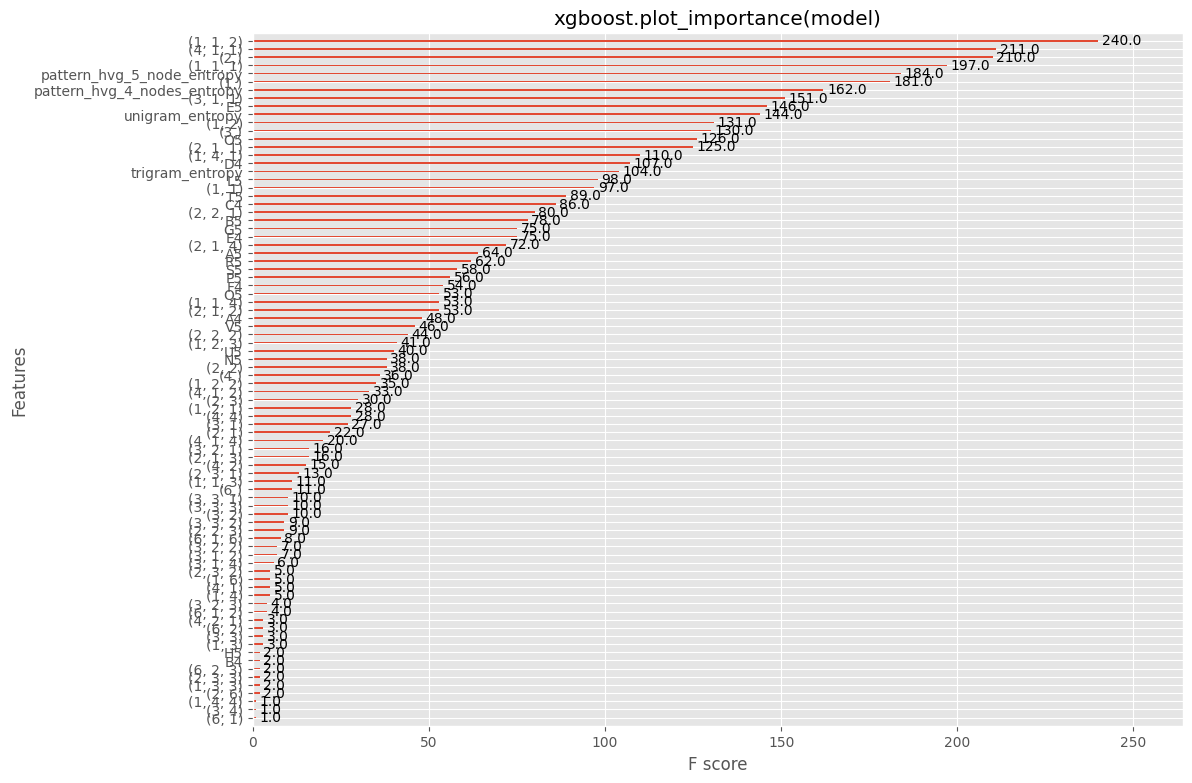

In [8]:
xgboost.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [9]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_res)

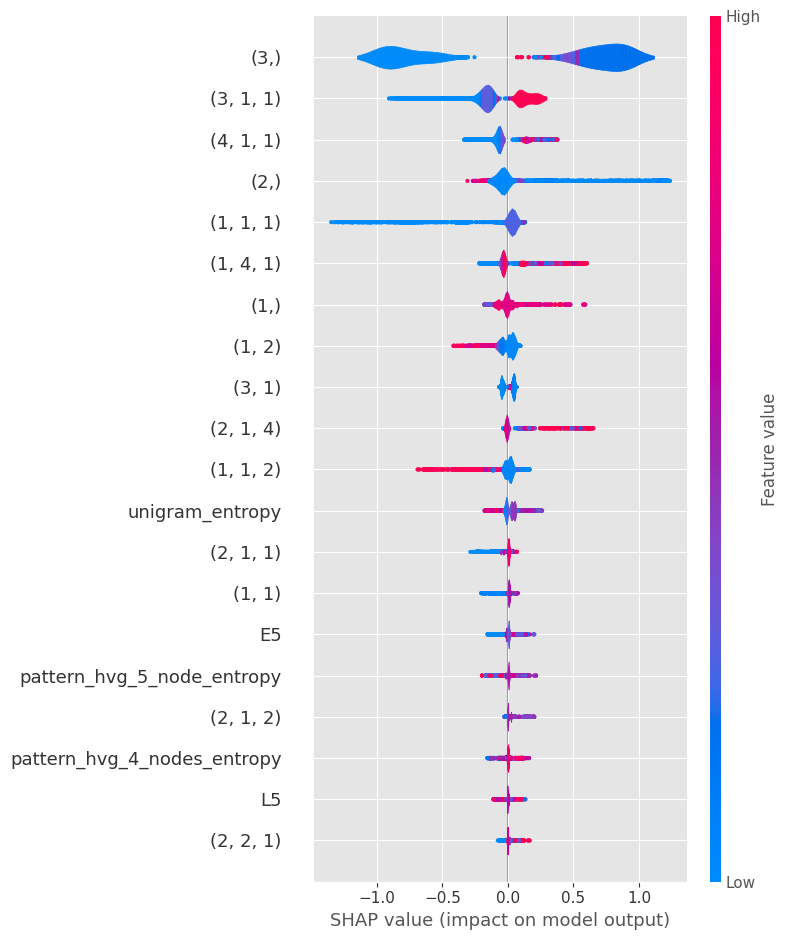

In [10]:
shap.summary_plot(shap_values, plot_type='violin')

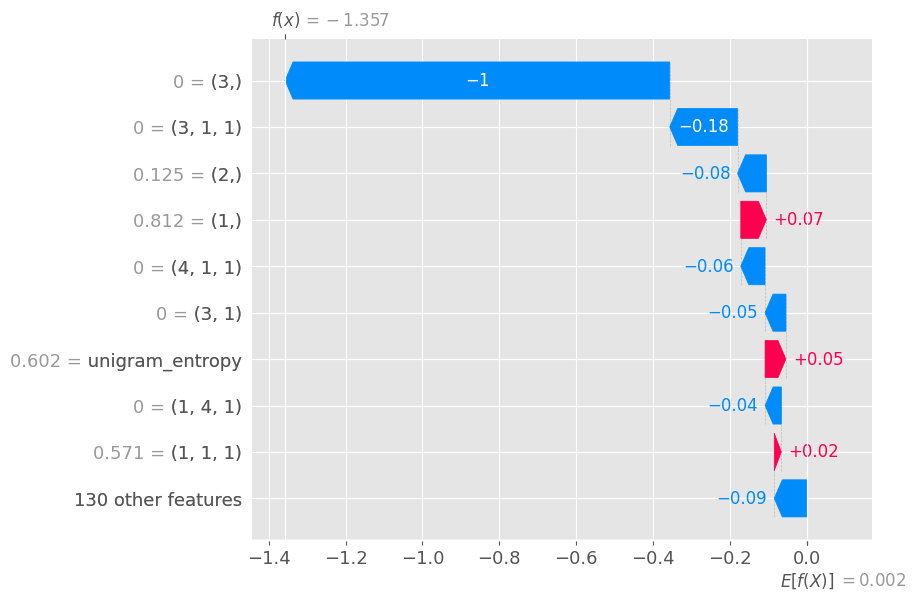

In [22]:
shap.plots.waterfall(shap_values[0])

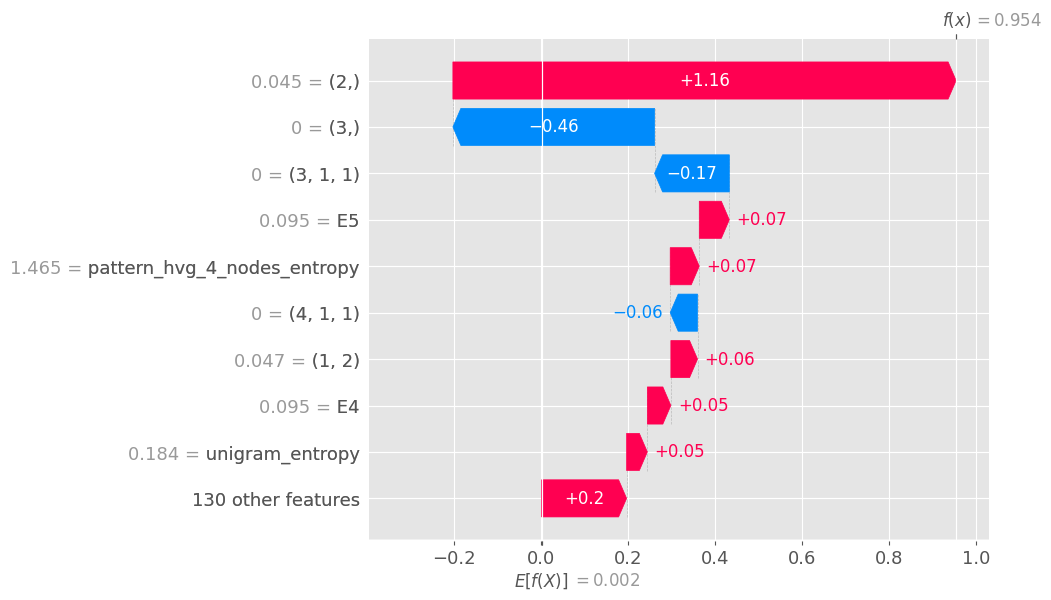

In [23]:
shap.plots.waterfall(shap_values[19747])

In [24]:
shap.plots.force(shap_values[0])

In [25]:
shap.plots.force(shap_values[19747])